In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city = "Norden, Bremen, Hamburg, Hannover, Berlin, Leipzig, Nurnberg, Munich, Ulm, Stuttgart, Karlsruhe, Frankfurt, Koln, Dusseldorf, Essen, Dortmund"

city_list = [c.strip() for c in city.split(',')]
G = nx.Graph()
G.add_nodes_from(city_list)

# Define physical links (edges) based on a typical German backbone topology
edges = [
    ("Norden", "Bremen"), ("Norden","Dortmund"), ("Bremen", "Hamburg"), ("Hamburg", "Hannover"),
    ("Hannover", "Berlin"), ("Hannover", "Bremen"), ("Berlin", "Leipzig"), ("Leipzig", "Nurnberg"), ("Nurnberg", "Munich"), 
    ("Munich", "Ulm"), ("Ulm", "Stuttgart"), ("Stuttgart", "Karlsruhe"), ("Frankfurt", "Koln"), 
    ("Koln", "Dusseldorf"), ("Dusseldorf", "Essen"), ("Essen", "Dortmund"), ("Dortmund", "Hannover"),
    ("Frankfurt", "Hannover"), ("Koln", "Dortmund"), ("Hamburg", "Berlin"), ("Hannover", "Leipzig"), 
    ("Leipzig", "Frankfurt"), ("Frankfurt", "Nurnberg"), ("Stuttgart","Nurnberg"), ("Frankfurt", "Karlsruhe")
]
G.add_edges_from(edges)

# Create the adjacency matrix
adj_matrix = nx.to_numpy_array(G)
df_topology = pd.DataFrame(adj_matrix, index=G.nodes(), columns=G.nodes())

In [3]:
df_topology

,Norden,Bremen,Hamburg,Hannover,Berlin,Leipzig,Nurnberg,Munich,Ulm,Stuttgart,Karlsruhe,Frankfurt,Koln,Dusseldorf,Essen,Dortmund
Norden,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bremen,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hamburg,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hannover,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Berlin,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leipzig,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Nurnberg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Munich,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Stuttgart,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
degrees = df_topology.sum(axis=1)
print("Degrees of each node:")
print(degrees)

Degrees of each node:
Norden        2.0
Bremen        3.0
Hamburg       3.0
Hannover      6.0
Berlin        3.0
Leipzig       4.0
Nurnberg      4.0
Munich        2.0
Ulm           2.0
Stuttgart     3.0
Karlsruhe     2.0
Frankfurt     5.0
Koln          3.0
Dusseldorf    2.0
Essen         2.0
Dortmund      4.0
dtype: float64


In [5]:
min_degree = degrees.min()
max_degree = degrees.max()
avg_degree = degrees.mean()

print(f"Minimum degree: {min_degree}")
print(f"Maximum degree: {max_degree}")
print(f"Average degree: {avg_degree:.2f}")

Minimum degree: 2.0
Maximum degree: 6.0
Average degree: 3.12


In [6]:
# 3. Variance of degree
var_degree = degrees.var(ddof=0)  # population variance
# If you prefer sample variance, use ddof=1

print(f"Variance of degree: {var_degree:.2f}")

Variance of degree: 1.36


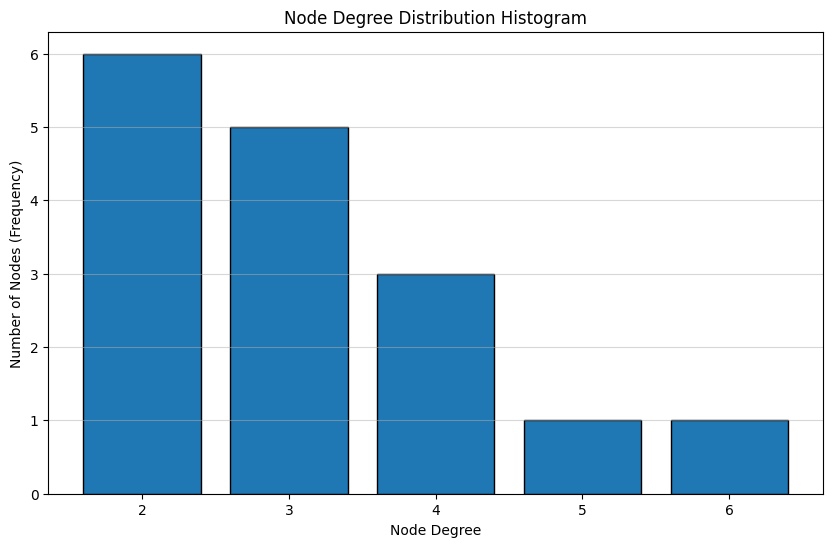

In [7]:
bins = np.arange(min_degree - 0.5, max_degree + 1.5, 1)

degrees.plot(kind='hist', 
             bins=bins,
             edgecolor='black',
             rwidth=0.8,
             figsize=(10, 6))
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes (Frequency)')
plt.title('Node Degree Distribution Histogram')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [8]:
weighted_matrix = df_topology.copy()

In [9]:
weighted_matrix.loc['Norden', 'Bremen'] = 121.73
weighted_matrix.loc['Bremen', 'Norden'] = 121.73

weighted_matrix.loc['Norden', 'Dortmund'] = 232.84
weighted_matrix.loc['Dortmund', 'Norden'] = 232.84

weighted_matrix.loc['Bremen', 'Hamburg'] = 94.8
weighted_matrix.loc['Hamburg', 'Bremen'] = 94.8

weighted_matrix.loc['Hamburg', 'Hannover'] = 131.22
weighted_matrix.loc['Hannover', 'Hamburg'] = 131.22

weighted_matrix.loc['Hamburg', 'Berlin'] = 256.28
weighted_matrix.loc['Berlin', 'Hamburg'] = 256.28

weighted_matrix.loc['Hannover', 'Berlin'] = 250.91
weighted_matrix.loc['Berlin', 'Hannover'] = 250.91

weighted_matrix.loc['Hannover', 'Bremen'] = 101
weighted_matrix.loc['Bremen', 'Hannover'] = 101

weighted_matrix.loc['Hannover', 'Leipzig'] = 215.78
weighted_matrix.loc['Leipzig', 'Hannover'] = 215.78

weighted_matrix.loc['Hannover', 'Frankfurt'] = 262.53
weighted_matrix.loc['Frankfurt', 'Hannover'] = 262.53

weighted_matrix.loc['Hannover', 'Dortmund'] = 183.11
weighted_matrix.loc['Dortmund', 'Hannover'] = 183.11

weighted_matrix.loc['Berlin', 'Leipzig'] = 149.91
weighted_matrix.loc['Leipzig', 'Berlin'] = 149.91

weighted_matrix.loc['Leipzig', 'Nurnberg'] = 230.08
weighted_matrix.loc['Nurnberg', 'Leipzig'] = 230.08

weighted_matrix.loc['Leipzig', 'Frankfurt'] = 294.3
weighted_matrix.loc['Frankfurt', 'Leipzig'] = 294.3

weighted_matrix.loc['Nurnberg', 'Munich'] = 151.51
weighted_matrix.loc['Munich', 'Nurnberg'] = 151.51

weighted_matrix.loc['Nurnberg', 'Stuttgart'] = 157.87
weighted_matrix.loc['Stuttgart', 'Nurnberg'] = 157.87

weighted_matrix.loc['Nurnberg', 'Frankfurt'] = 186.99
weighted_matrix.loc['Frankfurt', 'Nurnberg'] = 186.99

weighted_matrix.loc['Munich', 'Ulm'] = 122.06
weighted_matrix.loc['Ulm', 'Munich'] = 122.06

weighted_matrix.loc['Stuttgart', 'Karlsruhe'] = 62.93
weighted_matrix.loc['Karlsruhe', 'Stuttgart'] = 62.93

weighted_matrix.loc['Karlsruhe', 'Frankfurt'] = 124.12
weighted_matrix.loc['Frankfurt', 'Karlsruhe'] = 124.12

weighted_matrix.loc['Frankfurt', 'Koln'] = 152.52
weighted_matrix.loc['Koln', 'Frankfurt'] = 152.52

weighted_matrix.loc['Koln', 'Dusseldorf'] = 34.25
weighted_matrix.loc['Dusseldorf', 'Koln'] = 34.25

weighted_matrix.loc['Koln', 'Dortmund'] = 73.17
weighted_matrix.loc['Dortmund', 'Koln'] = 73.17

weighted_matrix.loc['Dusseldorf', 'Essen'] = 31.56
weighted_matrix.loc['Essen', 'Dusseldorf'] = 31.56

weighted_matrix.loc['Essen', 'Dortmund'] = 31.63
weighted_matrix.loc['Dortmund', 'Essen'] = 31.63

In [10]:
weighted_matrix

,Norden,Bremen,Hamburg,Hannover,Berlin,Leipzig,Nurnberg,Munich,Ulm,Stuttgart,Karlsruhe,Frankfurt,Koln,Dusseldorf,Essen,Dortmund
Norden,0.00,121.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,232.84
Bremen,121.73,0.00,94.80,101.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hamburg,0.00,94.80,0.00,131.22,256.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hannover,0.00,101.00,131.22,0.00,250.91,215.78,0.00,0.00,0.00,0.00,0.00,262.53,0.00,0.00,0.00,183.11
Berlin,0.00,0.00,256.28,250.91,0.00,149.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Leipzig,0.00,0.00,0.00,215.78,149.91,0.00,230.08,0.00,0.00,0.00,0.00,294.30,0.00,0.00,0.00,0.00
Nurnberg,0.00,0.00,0.00,0.00,0.00,230.08,0.00,151.51,0.00,157.87,0.00,186.99,0.00,0.00,0.00,0.00
Munich,0.00,0.00,0.00,0.00,0.00,0.00,151.51,0.00,122.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ulm,0.00,0.00,0.00,0.00,0.00,0.00,0.00,122.06,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
Stuttgart,0.00,0.00,0.00,0.00,0.00,0.00,157.87,0.00,1.00,0.00,62.93,0.00,0.00,0.00,0.00,0.00


In [11]:
weighted_matrix = weighted_matrix*1.8

In [12]:
weighted_matrix

,Norden,Bremen,Hamburg,Hannover,Berlin,Leipzig,Nurnberg,Munich,Ulm,Stuttgart,Karlsruhe,Frankfurt,Koln,Dusseldorf,Essen,Dortmund
Norden,0.000,219.114,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,419.112
Bremen,219.114,0.000,170.640,181.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Hamburg,0.000,170.640,0.000,236.196,461.304,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Hannover,0.000,181.800,236.196,0.000,451.638,388.404,0.000,0.000,0.000,0.000,0.000,472.554,0.000,0.000,0.000,329.598
Berlin,0.000,0.000,461.304,451.638,0.000,269.838,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Leipzig,0.000,0.000,0.000,388.404,269.838,0.000,414.144,0.000,0.000,0.000,0.000,529.740,0.000,0.000,0.000,0.000
Nurnberg,0.000,0.000,0.000,0.000,0.000,414.144,0.000,272.718,0.000,284.166,0.000,336.582,0.000,0.000,0.000,0.000
Munich,0.000,0.000,0.000,0.000,0.000,0.000,272.718,0.000,219.708,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Ulm,0.000,0.000,0.000,0.000,0.000,0.000,0.000,219.708,0.000,1.800,0.000,0.000,0.000,0.000,0.000,0.000
Stuttgart,0.000,0.000,0.000,0.000,0.000,0.000,284.166,0.000,1.800,0.000,113.274,0.000,0.000,0.000,0.000,0.000


In [13]:
from routing_v2_proj import Graph 

Number of Nodes:
8
Number of links:
12.0
Average Node Degree:
[3.0]
Network Diameter:
[np.int64(3)]
Average Number of Hops per Demand:
[np.float64(1.8214285714285714)]
Minimum link length:
10.0
Maximum link length:
40.0
Average link length:
17.5
Total Number of Paths:
56
Ordered Paths:
Path: [1, 2] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[1, 2]])
Path: [2, 1] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[2, 1]])
Path: [1, 3] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[1, 3]])
Path: [3, 1] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[3, 1]])
Path: [2, 3] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[2, 3]])
Path: [3, 2] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[3, 2]])
Path: [3, 4] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[3, 4]])
Path: [4, 3] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[4, 3]])
Path: [3, 5] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og. Path: [[3, 5]])
Path: [5, 3] , Dist: 10 , Og.Dist: 10 , traffic = 1 (Og.

In [14]:
weighted_list = weighted_matrix.values.tolist()
unweighted_list = df_topology.values.tolist()
print(f"Weighted matrix shape: {len(weighted_list)}x{len(weighted_list[0])}")
print(f"Unweighted matrix shape: {len(unweighted_list)}x{len(unweighted_list[0])}")

Weighted matrix shape: 16x16
Unweighted matrix shape: 16x16


In [15]:
# For UNWEIGHTED Graph

import routing_v2_proj as routing

# Create graph object
graph = routing.Graph()

# 1. Get shortest paths for UNWEIGHTED graph
print("=== UNWEIGHTED GRAPH ===")
unweighted_paths = routing.shortestPaths(graph, unweighted_list)

# 2. Count hops
hop_matrix_unweighted = routing.countHops(unweighted_paths)

print(f"Number of nodes: {len(unweighted_list)}")
print(f"Hop matrix (sample): {hop_matrix_unweighted[:3]}")

=== UNWEIGHTED GRAPH ===
Number of nodes: 16
Hop matrix (sample): [[0, 1, 2, 2, 3, 3, 4, 5, 6, 5, 4, 3, 2, 3, 2, 1], [1, 0, 1, 1, 2, 2, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2], [2, 1, 0, 1, 1, 2, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2]]


In [16]:
# For WEIGHTED Graph

print("\n=== WEIGHTED GRAPH ===")
weighted_paths = routing.shortestPaths(graph, weighted_list)

# Count hops for weighted (but uses distances)
hop_matrix_weighted = routing.countHops(weighted_paths)

# To get distances, you need to extract them from paths
def extract_distances_and_paths(paths_list):
    """Extract distances and paths for all node pairs"""
    all_distances = []
    all_paths = []
    
    for src_paths in paths_list:
        for p in src_paths:
            all_distances.append({
                'source': p['source'],
                'destination': p['destination'],
                'distance': p['distance'],
                'path': p['path'][0] if p['path'] else []  # Take first shortest path
            })
    
    return all_distances

weighted_distances = extract_distances_and_paths(weighted_paths)
unweighted_distances = extract_distances_and_paths(unweighted_paths)


=== WEIGHTED GRAPH ===


In [17]:
print(f"Sample weighted path: {weighted_distances[38]}")

Sample weighted path: {'source': 3, 'destination': 7, 'distance': 1038.7440000000001, 'path': [3, 4, 6, 7]}


In [ ]:
weighted_distances